# Imports and Libraries :

In [564]:
import warnings
warnings.filterwarnings("ignore")
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
import joblib

# Prepare some functions to use :

### 1) :

In [568]:
def GetValuesCounts(data):
    import pandas as pd
    columns = [col for col in data.columns ]

    for col in columns:
        print(data[col].value_counts(),"\n")

##### Function to get the all values of each column 

### 2) :

In [572]:
def GetObjectFeatures(data) :
    object_columns = [col for col in data.columns if data[col].dtype == 'object']

    for col in object_columns :
        print(data[col].value_counts(),"\n")

### 3) :

In [574]:
def PBP (data):
    #PbP refers to "Plot Box Plot" and it works only for the datatype of integer and float columns .
    
    for col in data.select_dtypes(include=['int', 'float']).columns:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(f'Boxplot of {col}')
        bp=data.boxplot(column=col)
        plt.show()
        plt.close(fig)

### 4 ) :

In [577]:
def TribleP(data):
    # TribleP refers to Plot Pair Plot 
    columns = [col for col in data.columns]
    custom_palette = sns.color_palette("coolwarm", 6)

    for col in columns:
        if data[col].value_counts().count() <= 6:
            sns.pairplot(data, hue=col, palette=custom_palette)
            plt.show()
        else:
            continue

### 5) : 

In [581]:
def PDP(data):
    # PDP refers to Plot Distribution Plot 
    columns = [col for col in data.columns]
    colors = sns.color_palette("coolwarm", len(columns))
    
    for i, col in enumerate(data.select_dtypes(include=['int', 'float']).columns):
        if data[col].value_counts().count() <= 10000:
            sns.histplot(data[col], kde=True, bins=15, color=colors[i % len(colors)])
            plt.title(f'Distribution of {col}')
            plt.show()

### 6) : 

In [584]:
def PlotPie(data):
    custom_palette = "coolwarm"
    sns.set_palette(custom_palette)
    

    plt.figure(figsize=(8, 6))
    
    columns = [col for col in data.columns]
    
    for col in columns:
        if data[col].value_counts().count() <= 10:
            # Plot pie chart
            plt.figure(figsize=(6,6))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f"Distribution of {col}")
            plt.ylabel("")
            plt.axis('equal')  
            plt.show()

### 7) :

In [636]:
models = {
        'Neural Network': MLPClassifier(hidden_layer_sizes=(4,), max_iter=50, random_state=42),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        }


def plot_confusion_matrix_custom(y_test, y_pred , models):
    
    CM = confusion_matrix(y_test, y_pred)
    print(CM)
    sns.heatmap(CM, annot=True, cmap="coolwarm")
    plt.show()

def TrainEvaluateModel(X_train, y_train, X_test, y_test , models):
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy}')
        
        plot_confusion_matrix_custom(y_test, y_pred,models)
        
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
        print(f"ROC-AUC: {roc_auc_score(y_test, y_pred, multi_class='ovo'):.4f}",)
        print("\n")
        
        print(f'Classification Report for {model_name}:\n')
        print(classification_report(y_test, y_pred, target_names=['Have job fair', "Doesn't have job fair"]))
        print('\n' + '-'*60 + '\n')

### 8) :

In [590]:
def PlotFeaturesImportance(X, y, models):
    feature_importances = {}

    for name, model in models.items():
        model.fit(X, y)
        if hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])
        elif hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        else:
            importances = None
        if importances is not None:
            feature_importances[name] = importances

    # Convert to DataFrame for easier plotting way with the barchart
    feature_importances_df = pd.DataFrame(feature_importances, index=X.columns)

    # Plot  each feature importance
    feature_importances_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.legend(title='Model')
    plt.show()

### 9) :

In [769]:
def PlotOverfitting(models,X_train,X_val,y_train,y_val,metric=accuracy_score):
    train_scores = []
    val_scores = []
    model_names = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        train_score = metric(y_train, y_train_pred)
        val_score = metric(y_val, y_val_pred)
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        model_names.append(name)

    x = range(len(model_names))
    plt.figure(figsize=(12, 6))
    plt.plot(x, train_scores, label='Training Score', marker='|')
    plt.plot(x, val_scores, label='Validation Score', marker='x')
    plt.xticks(x, model_names, rotation=45)
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Training vs Validation Scores')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 10) :

In [673]:
def SaveModels (models, base_filename="Models"):
    for name, model in models.items():
        filename = f"{base_filename} - {name}.sav"
        joblib.dump(model, filename)
        print(f"Model '{name}' saved as '{filename}'.")

# Reading Data : 

In [773]:
data=pd.read_csv(r"C:\Users\Tarek Mohamed\student_job_fair_data.csv")
copied_data=copy.deepcopy(data)

# EDA : 

In [521]:
data.head(7)

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0
5,6,Python,1,66.57,7,3,1
6,7,Java,2,93.84,1,3,0


In [211]:
data.tail()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
19995,19996,Python,1,62.54,1,2,1
19996,19997,Python;Machine Learning,2,84.13,2,2,1
19997,19998,Data Analysis;Java;Machine Learning,1,83.76,7,2,1
19998,19999,SQL;Python,2,60.50,2,3,1
19999,20000,Machine Learning,1,73.69,9,3,1


In [212]:
data.describe()

,student_id,experience_years,course_grades,projects_completed,extracurriculars,job_offer
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,2.499100,80.092985,4.524850,1.997100,0.493750
std,5773.647028,1.710861,11.519916,2.860278,1.413397,0.499973
min,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,5000.750000,1.000000,70.127500,2.000000,1.000000,0.000000
50%,10000.500000,3.000000,80.170000,5.000000,2.000000,0.000000
75%,15000.250000,4.000000,90.000000,7.000000,3.000000,1.000000
max,20000.000000,5.000000,100.000000,9.000000,4.000000,1.000000


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


In [218]:
data.isna().sum()

student_id            0
skills                0
experience_years      0
course_grades         0
projects_completed    0
extracurriculars      0
job_offer             0
dtype: int64

###### this data doesn't contain any missing values .

In [221]:
data.duplicated().sum()

0

###### this data doesn't contain any duplicated records  .

In [224]:
GetValuesCounts(data)

student_id
1        1
13331    1
13338    1
13337    1
13336    1
        ..
6667     1
6666     1
6665     1
6664     1
20000    1
Name: count, Length: 20000, dtype: int64 

skills
C++                             1174
Data Analysis                   1150
Java                            1150
SQL                             1122
Machine Learning                1076
                                ... 
Data Analysis;Java;Python         41
C++;SQL;Java                      40
SQL;Data Analysis;Java            40
Java;Machine Learning;C++         40
Python;Java;Machine Learning      32
Name: count, Length: 156, dtype: int64 

experience_years
4    3395
1    3388
0    3349
3    3339
5    3313
2    3216
Name: count, dtype: int64 

course_grades
98.89    15
82.93    14
79.94    14
70.31    13
91.14    13
         ..
83.77     1
70.80     1
87.71     1
91.75     1
72.67     1
Name: count, Length: 3982, dtype: int64 

projects_completed
5    2038
6    2031
4    2014
7    2013
9    2004
2    200

###### to know the count of each value in every column .

In [50]:
GetObjectFeatures(data)

skills
C++                             1174
Data Analysis                   1150
Java                            1150
SQL                             1122
Machine Learning                1076
                                ... 
Data Analysis;Java;Python         41
C++;SQL;Java                      40
SQL;Data Analysis;Java            40
Java;Machine Learning;C++         40
Python;Java;Machine Learning      32
Name: count, Length: 156, dtype: int64 



##### Only one column needs to be encoded .

# Visualized EDA : 

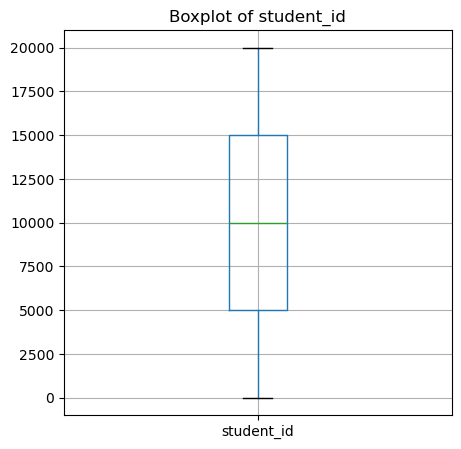

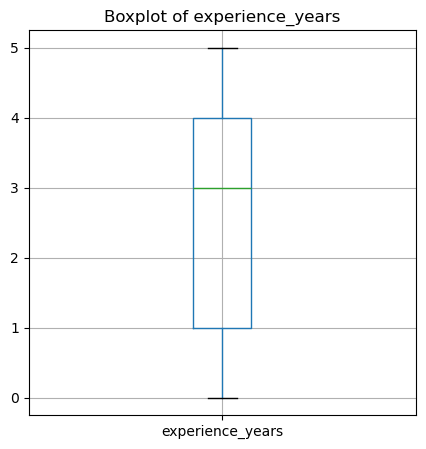

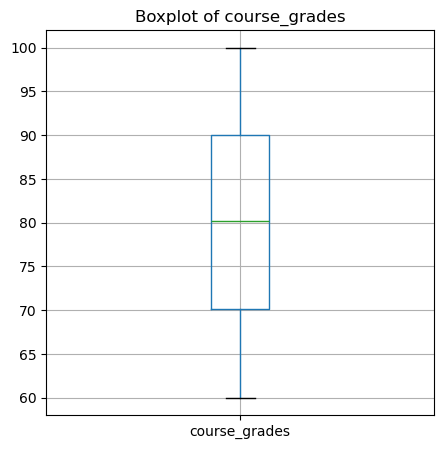

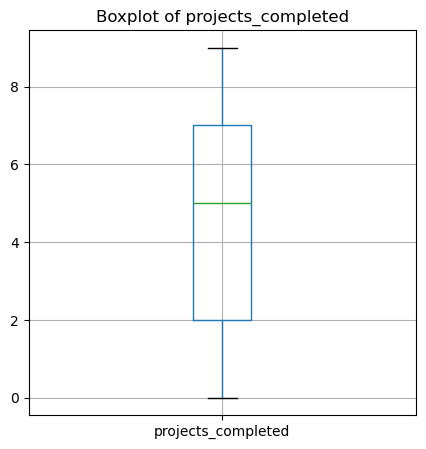

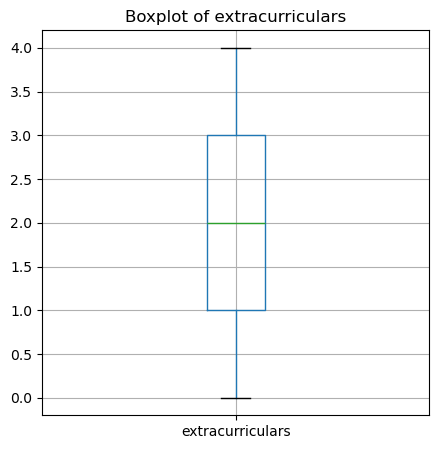

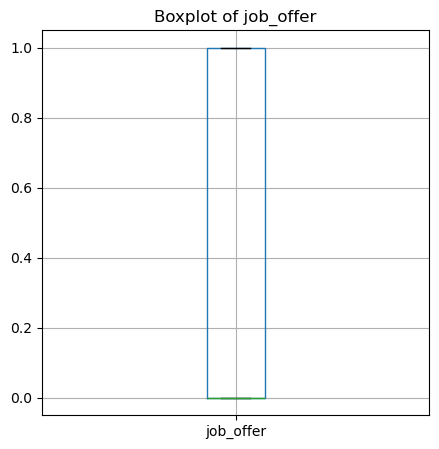

In [54]:
PBP(data)

##### The data doesn't contain any outliers , the data is one of the cleanest data I have work on ever , But records need to be increased 

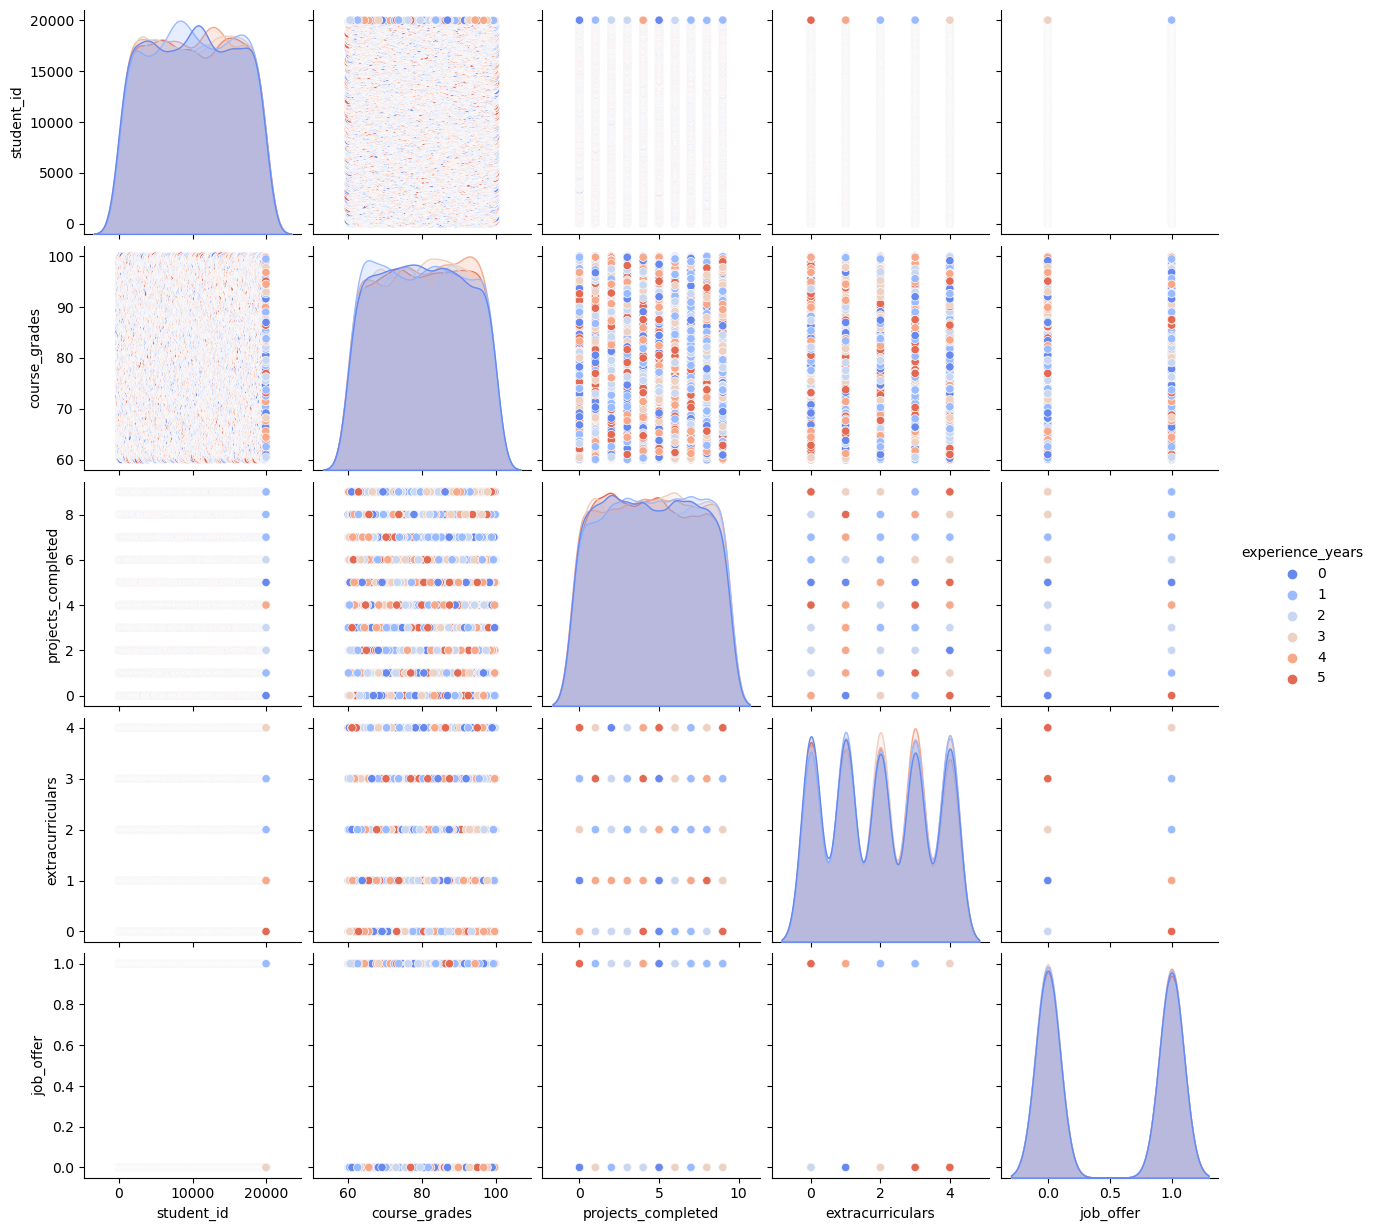

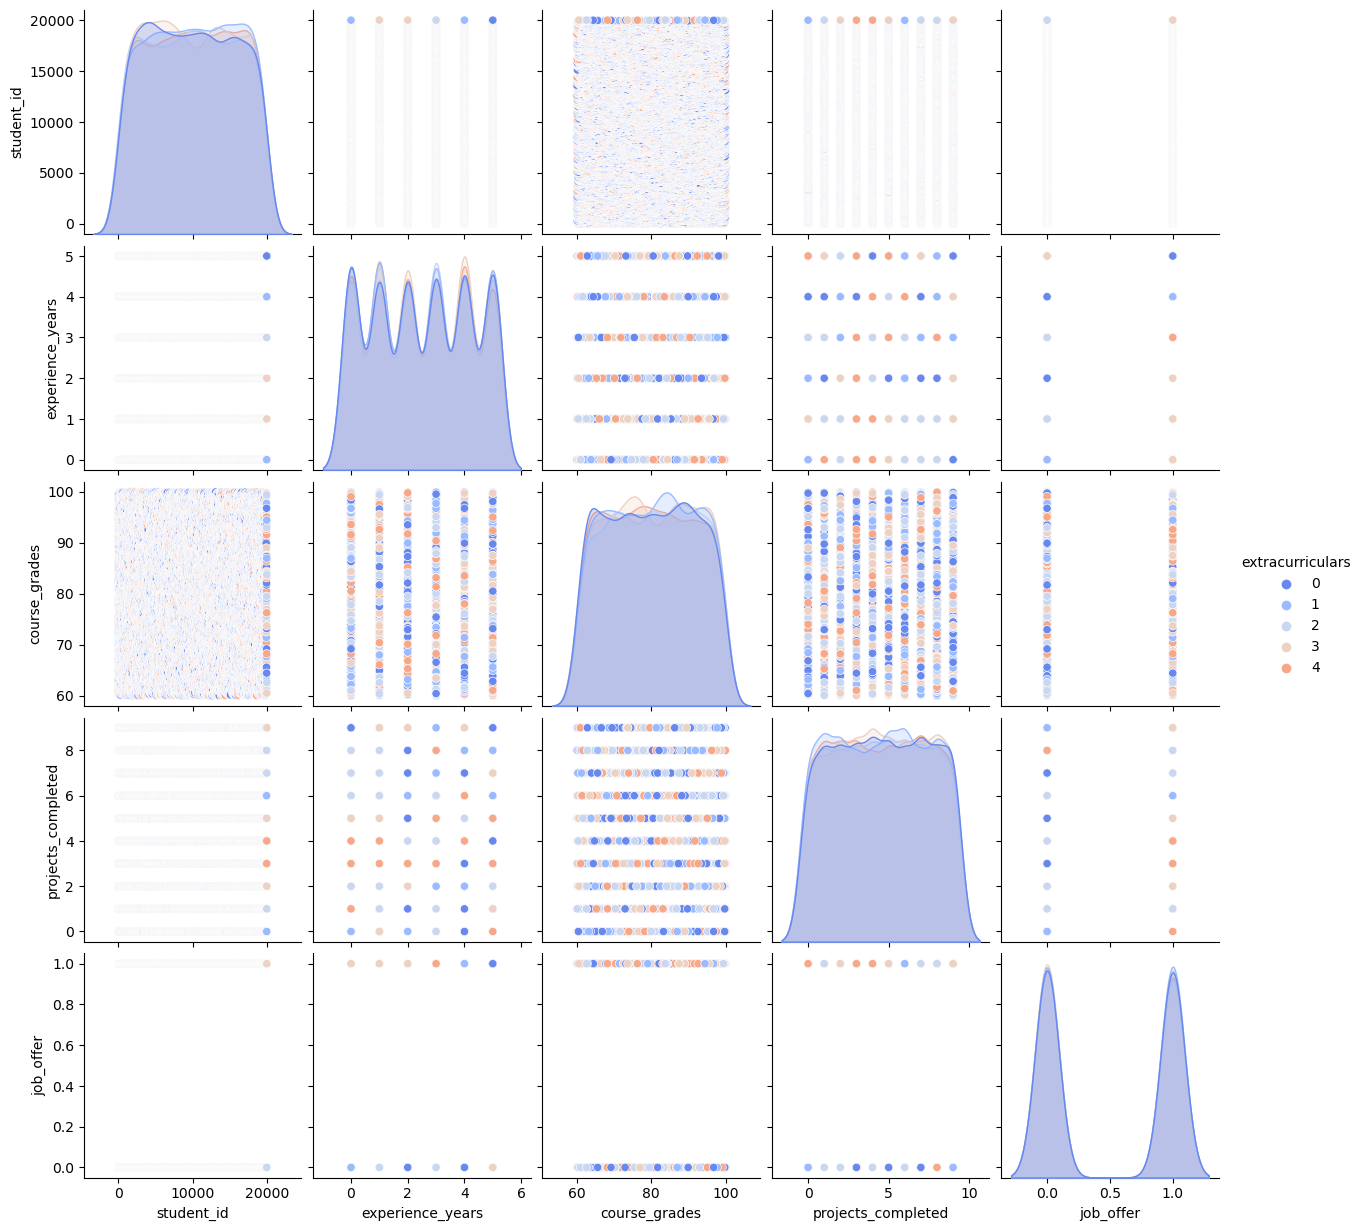

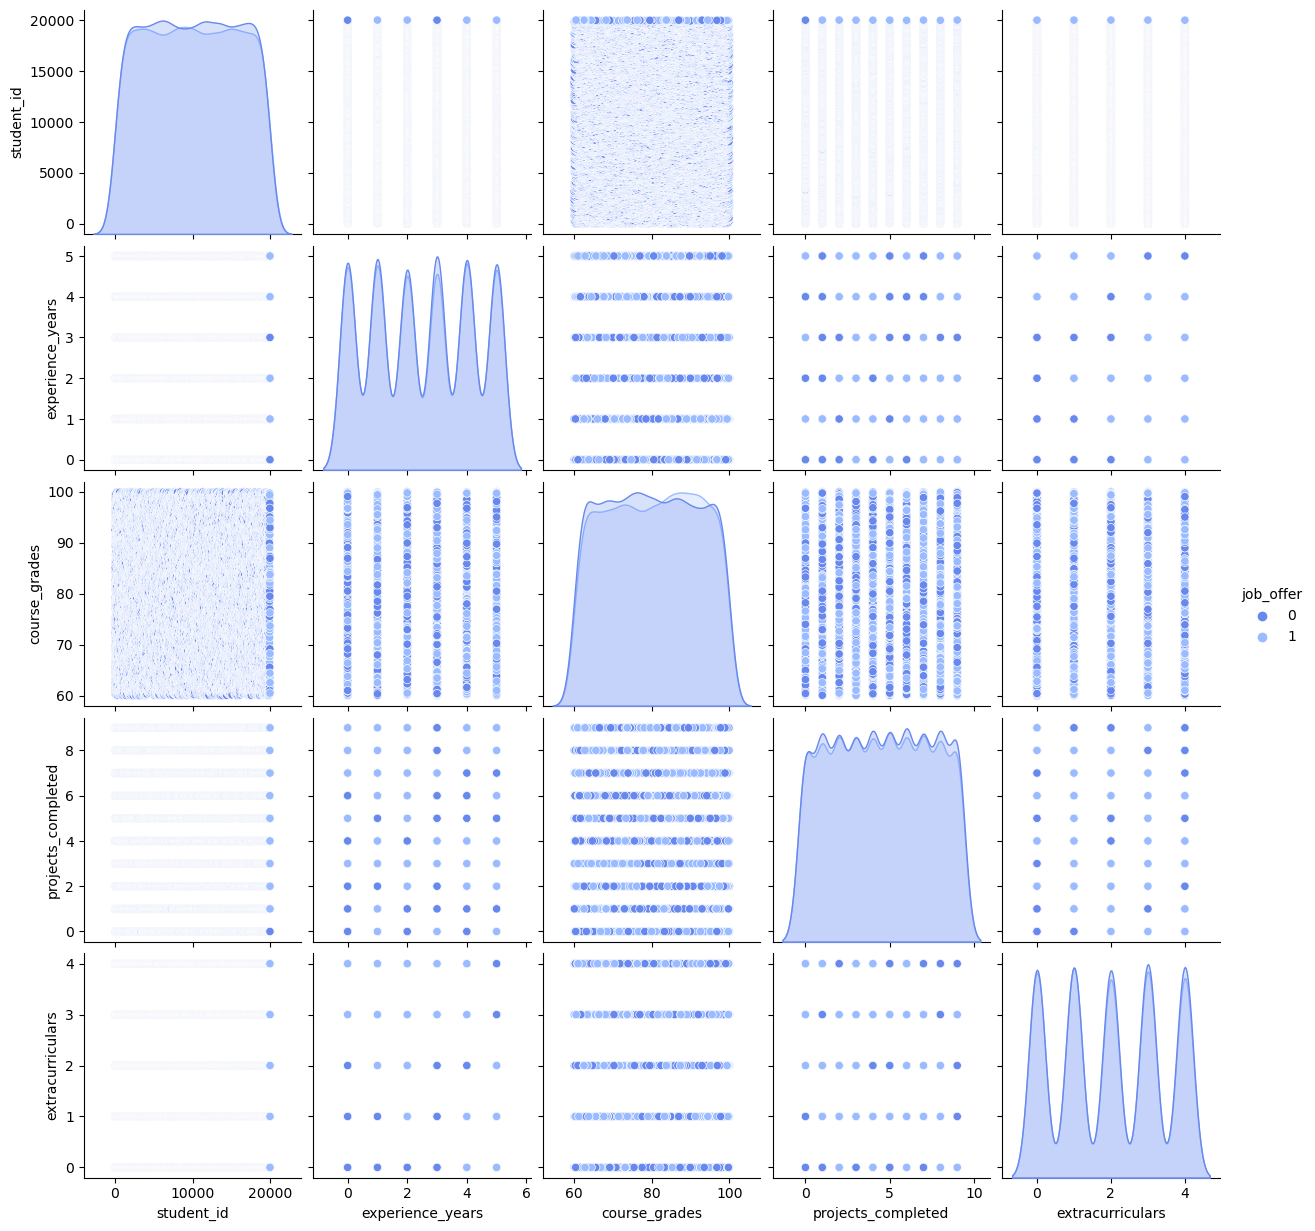

In [57]:
TribleP(data)

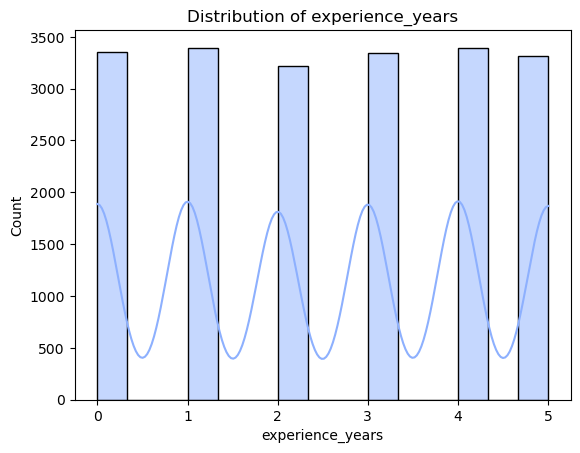

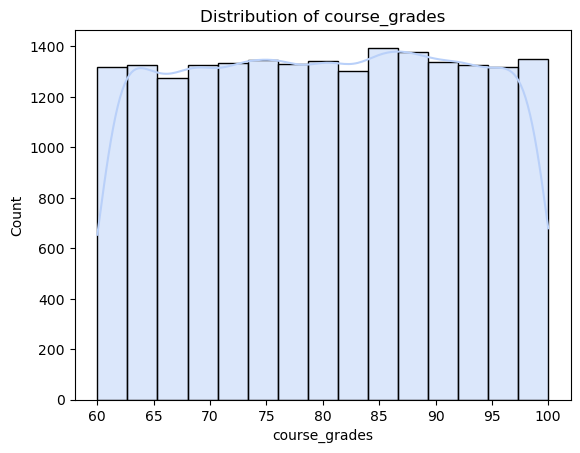

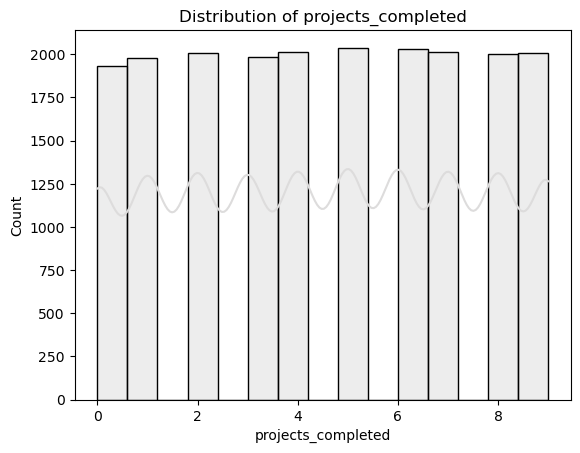

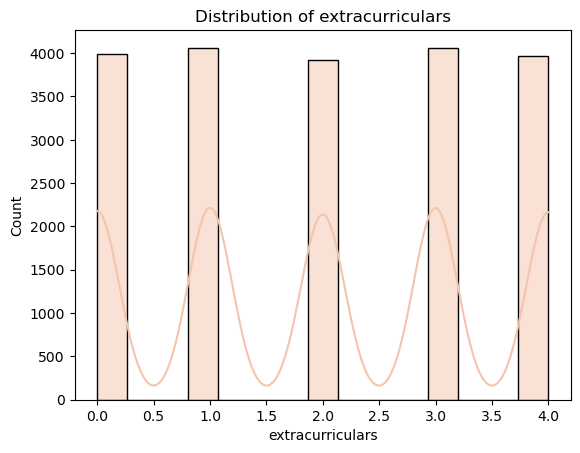

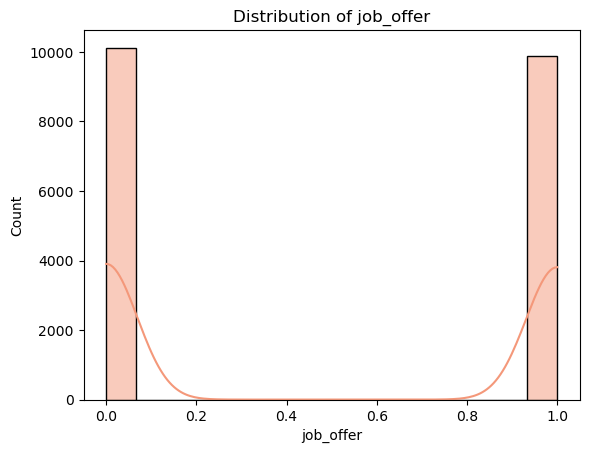

In [59]:
PDP(data)

<Figure size 800x600 with 0 Axes>

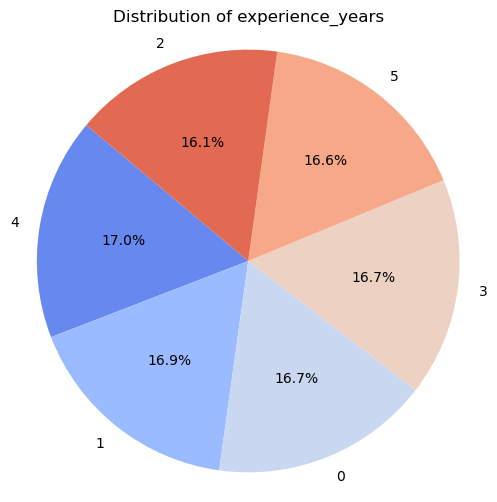

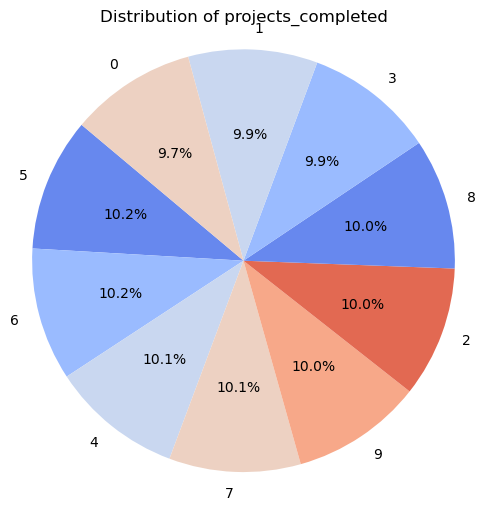

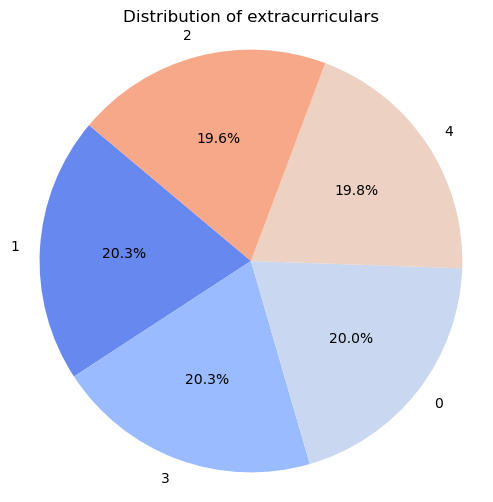

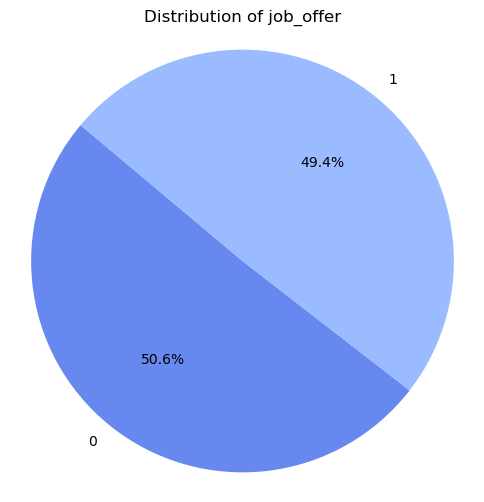

In [61]:
PlotPie(data)

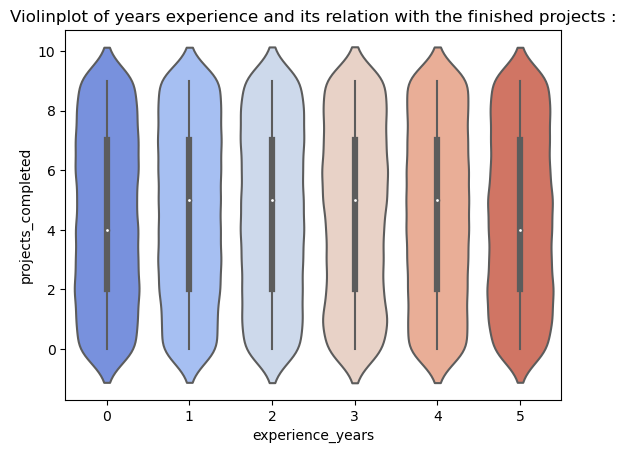

In [63]:
sns.violinplot(x="experience_years", y='projects_completed', data=data, palette="coolwarm")
plt.title('Violinplot of years experience and its relation with the finished projects :')
plt.show()

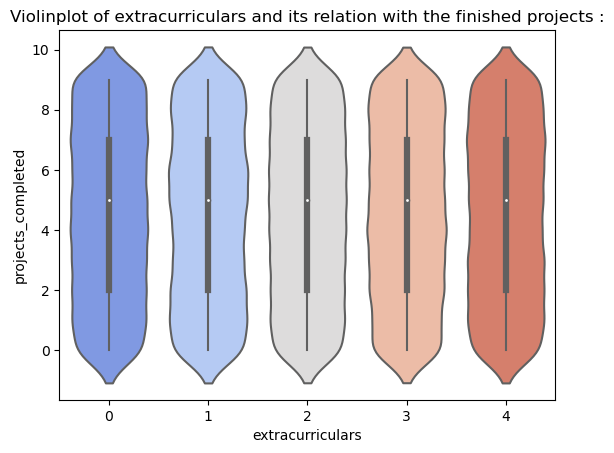

In [65]:
sns.violinplot(x="extracurriculars", y='projects_completed', data=data, palette="coolwarm")
plt.title('Violinplot of extracurriculars and its relation with the finished projects :')
plt.show()

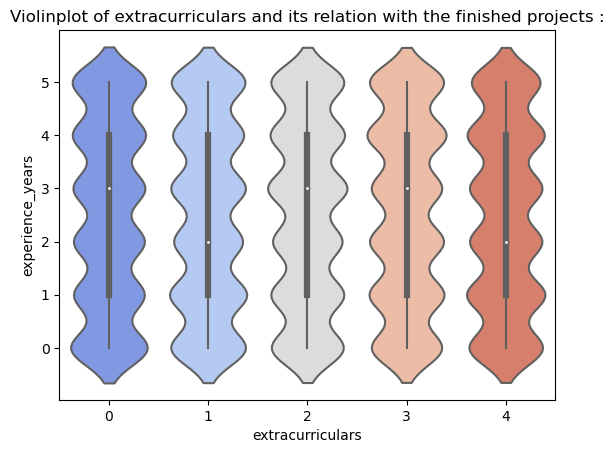

In [67]:
sns.violinplot(x="extracurriculars", y='experience_years', data=data, palette="coolwarm")
plt.title('Violinplot of extracurriculars and its relation with the finished projects :')
plt.show()

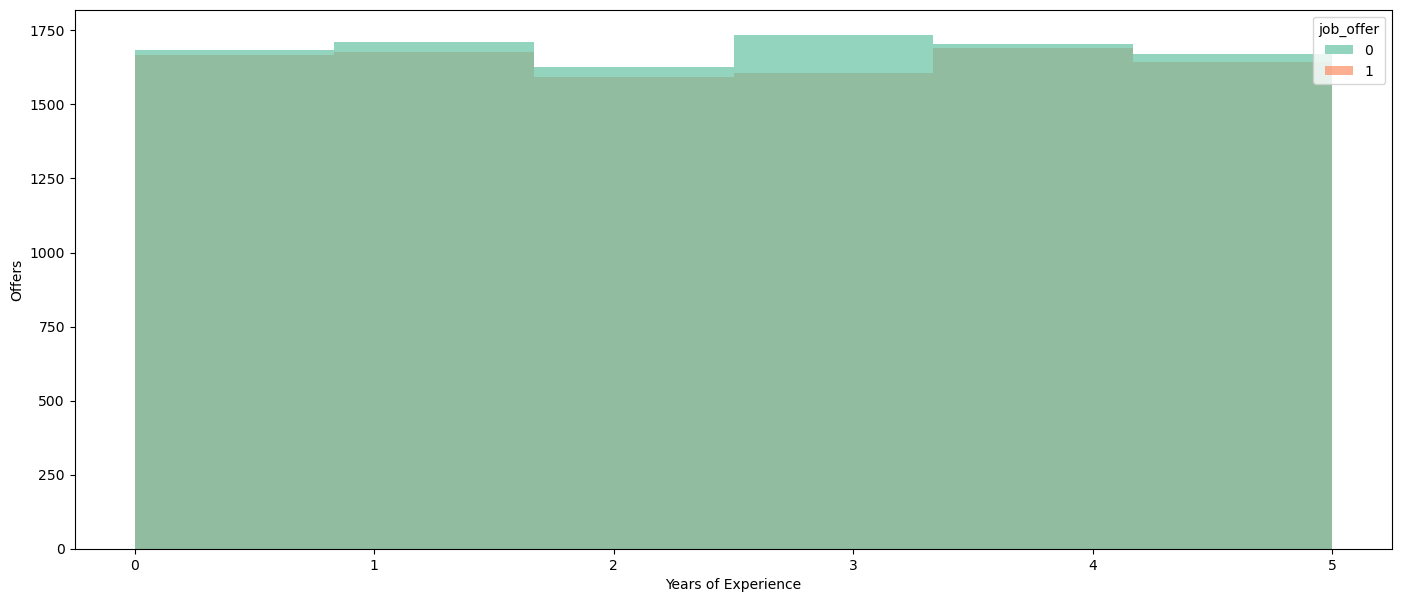

In [69]:
plt.figure(figsize=(17, 7))
sns.histplot(data=data, x="experience_years", hue="job_offer", palette="Set2", edgecolor='none', alpha=0.7, bins=6)
plt.xlabel('Years of Experience')
plt.ylabel('Offers')
plt.show()

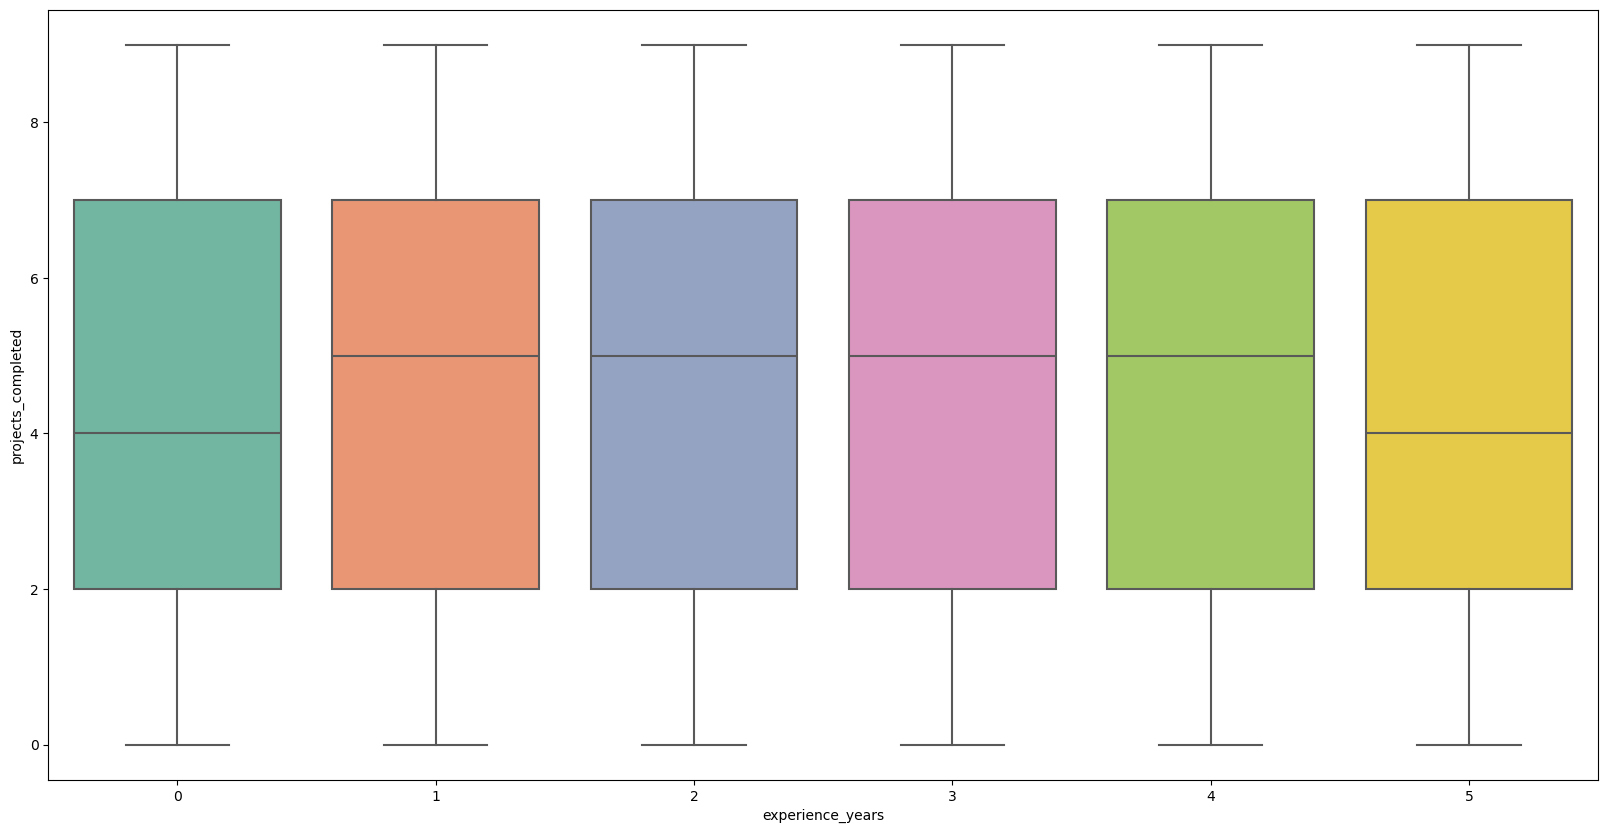

In [71]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="experience_years", y="projects_completed")
plt.show()

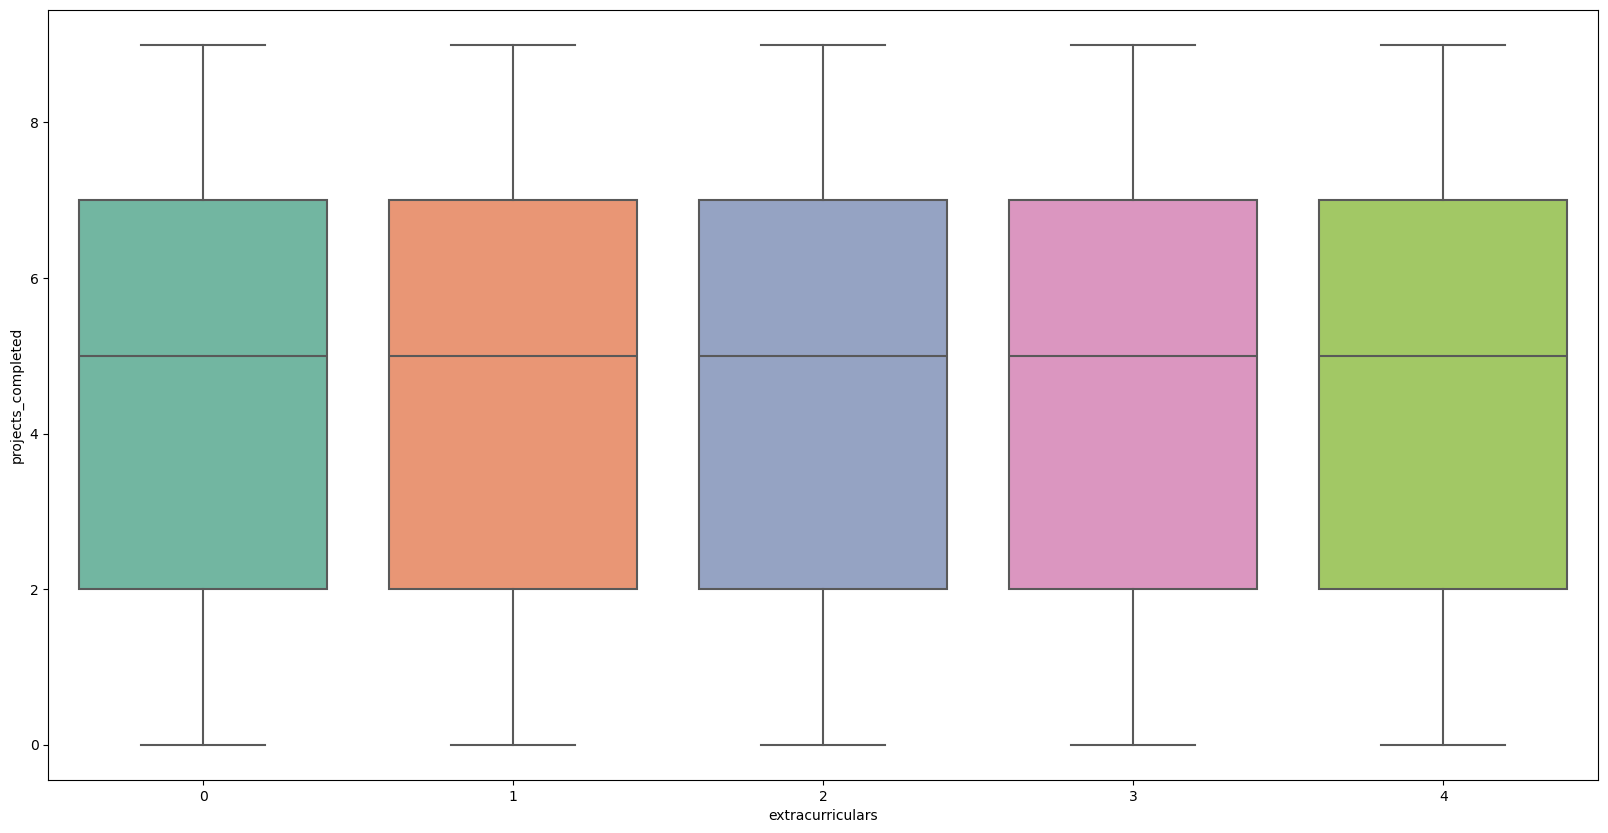

In [73]:
custom_palette = "Set2"
sns.set_palette(custom_palette)
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="extracurriculars", y="projects_completed")
plt.show()

# Pre-Processing Operations :

##### Dropping columns that has no importance like ID 

In [775]:
data.drop(columns=["student_id"],inplace=True)

##### It will has many steps because the skills are seperated with " ;"

### Encoding the Skills Features :

In [779]:
# Step 1: Split skills into separate columns
skills_split = data['skills'].str.get_dummies(sep=';')

# Step 2: Count the number of skills each person has
skill_counts = data['skills'].str.split(';').apply(len)

# Step 3: Scale each skill column by the number of skills possessed
for col in skills_split.columns:
    skills_split[col] *= skill_counts

# Step 4: Merge with original DataFrame and drop the original skills column
data_encoded = pd.concat([data.drop(columns=['skills']), skills_split], axis=1)

In [781]:
data_encoded.head()

,experience_years,course_grades,projects_completed,extracurriculars,job_offer,C++,Data Analysis,Java,Machine Learning,Python,SQL
0,3,75.26,9,0,1,0,3,0,0,3,3
1,4,74.25,6,2,1,0,0,1,0,0,0
2,2,74.89,4,3,0,0,1,0,0,0,0
3,4,72.73,2,3,1,0,1,0,0,0,0
4,4,84.85,1,4,0,3,0,0,3,3,0


In [783]:
# Saving Scaled Features as CSV File
data_encoded.to_csv('Encoded Data.csv', index=False)

##### Splitting data to features and goal (The first split )

In [786]:
Features=data_encoded.drop(columns=["job_offer"])
Goal=data_encoded["job_offer"]

In [788]:
Features.head(10)

,experience_years,course_grades,projects_completed,extracurriculars,C++,Data Analysis,Java,Machine Learning,Python,SQL
0,3,75.26,9,0,0,3,0,0,3,3
1,4,74.25,6,2,0,0,1,0,0,0
2,2,74.89,4,3,0,1,0,0,0,0
3,4,72.73,2,3,0,1,0,0,0,0
4,4,84.85,1,4,3,0,0,3,3,0
5,1,66.57,7,3,0,0,0,0,1,0
6,2,93.84,1,3,0,0,1,0,0,0
7,2,92.50,7,2,0,0,0,1,0,0
8,2,79.06,4,1,0,0,3,3,3,0
9,4,94.11,8,3,3,3,0,3,0,0


In [790]:
Goal.head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    0
8    0
9    1
Name: job_offer, dtype: int64

##### The range in the numerical features are not big so we don't need to scale .

##### Splitting data to train and test groups (The second split )

In [794]:
Ftrain,Ftest,Gtrain,Gtest=train_test_split(data_encoded,Goal,test_size=0.4,random_state=99)

In [796]:
Ftrain.head()

,experience_years,course_grades,projects_completed,extracurriculars,job_offer,C++,Data Analysis,Java,Machine Learning,Python,SQL
13741,0,69.14,8,1,0,0,0,2,2,0,0
764,0,89.17,6,0,0,0,0,0,0,1,0
5857,4,85.04,4,0,1,0,0,3,3,0,3
7853,0,84.42,1,0,0,0,0,1,0,0,0
15761,0,69.34,4,1,0,0,0,3,3,0,3


In [798]:
Ftest.head()

,experience_years,course_grades,projects_completed,extracurriculars,job_offer,C++,Data Analysis,Java,Machine Learning,Python,SQL
3223,0,74.97,9,2,1,2,0,2,0,0,0
6778,1,72.87,7,2,1,0,2,0,0,0,2
2088,2,74.36,3,3,0,0,3,3,3,0,0
8681,1,88.56,8,1,0,0,2,0,2,0,0
18588,1,82.35,9,4,1,0,1,0,0,0,0


In [800]:
Gtrain.head()

13741    0
764      0
5857     1
7853     0
15761    0
Name: job_offer, dtype: int64

In [802]:
Gtest.head()

3223     1
6778     1
2088     0
8681     0
18588    1
Name: job_offer, dtype: int64

# Training and Evaluating Models :

### Models we will use :

In [810]:
models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(6,), max_iter=11, random_state=42)}

Logistic Regression Accuracy: 1.0
[[6072    0]
 [   0 5928]]


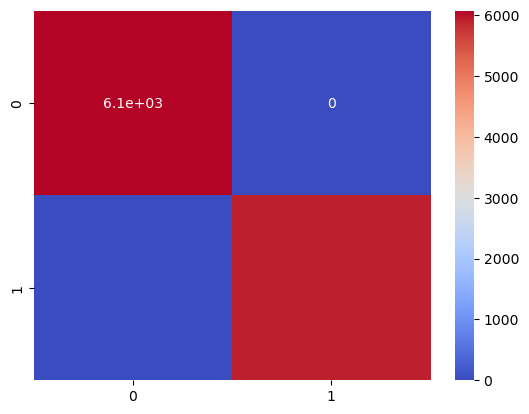

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


Classification Report for Logistic Regression:

                       precision    recall  f1-score   support

        Have job fair       1.00      1.00      1.00      6072
Doesn't have job fair       1.00      1.00      1.00      5928

             accuracy                           1.00     12000
            macro avg       1.00      1.00      1.00     12000
         weighted avg       1.00      1.00      1.00     12000


------------------------------------------------------------

Random Forest Accuracy: 1.0
[[6072    0]
 [   0 5928]]


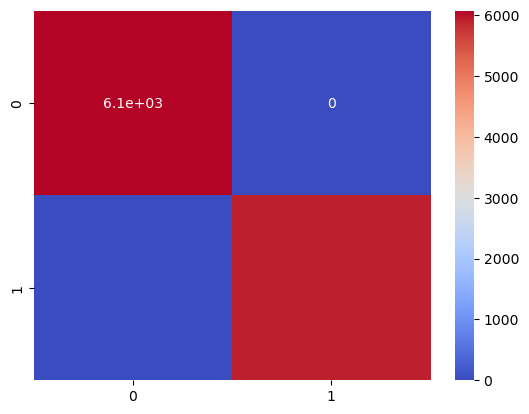

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


Classification Report for Random Forest:

                       precision    recall  f1-score   support

        Have job fair       1.00      1.00      1.00      6072
Doesn't have job fair       1.00      1.00      1.00      5928

             accuracy                           1.00     12000
            macro avg       1.00      1.00      1.00     12000
         weighted avg       1.00      1.00      1.00     12000


------------------------------------------------------------

Gradient Boosting Accuracy: 1.0
[[6072    0]
 [   0 5928]]


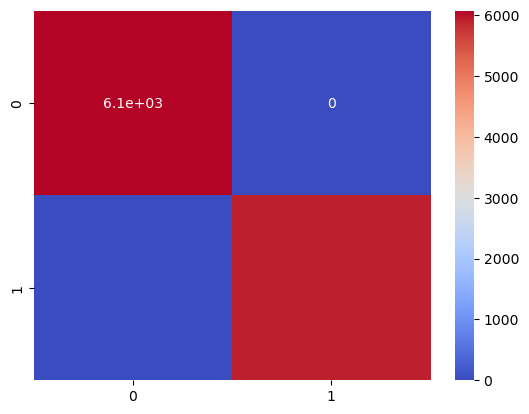

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


Classification Report for Gradient Boosting:

                       precision    recall  f1-score   support

        Have job fair       1.00      1.00      1.00      6072
Doesn't have job fair       1.00      1.00      1.00      5928

             accuracy                           1.00     12000
            macro avg       1.00      1.00      1.00     12000
         weighted avg       1.00      1.00      1.00     12000


------------------------------------------------------------

Decision Tree Accuracy: 1.0
[[6072    0]
 [   0 5928]]


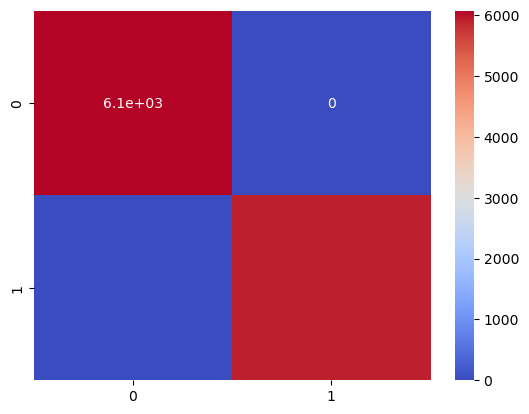

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


Classification Report for Decision Tree:

                       precision    recall  f1-score   support

        Have job fair       1.00      1.00      1.00      6072
Doesn't have job fair       1.00      1.00      1.00      5928

             accuracy                           1.00     12000
            macro avg       1.00      1.00      1.00     12000
         weighted avg       1.00      1.00      1.00     12000


------------------------------------------------------------

Neural Network Accuracy: 0.9569166666666666
[[5683  389]
 [ 128 5800]]


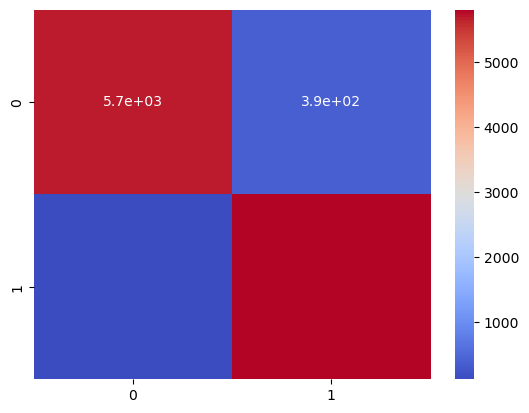

Precision: 0.9578
Recall: 0.9569
F1-Score: 0.9569
ROC-AUC: 0.9572


Classification Report for Neural Network:

                       precision    recall  f1-score   support

        Have job fair       0.98      0.94      0.96      6072
Doesn't have job fair       0.94      0.98      0.96      5928

             accuracy                           0.96     12000
            macro avg       0.96      0.96      0.96     12000
         weighted avg       0.96      0.96      0.96     12000


------------------------------------------------------------



In [812]:
TrainEvaluateModel(Ftest,Gtest,Ftrain,Gtrain,models)

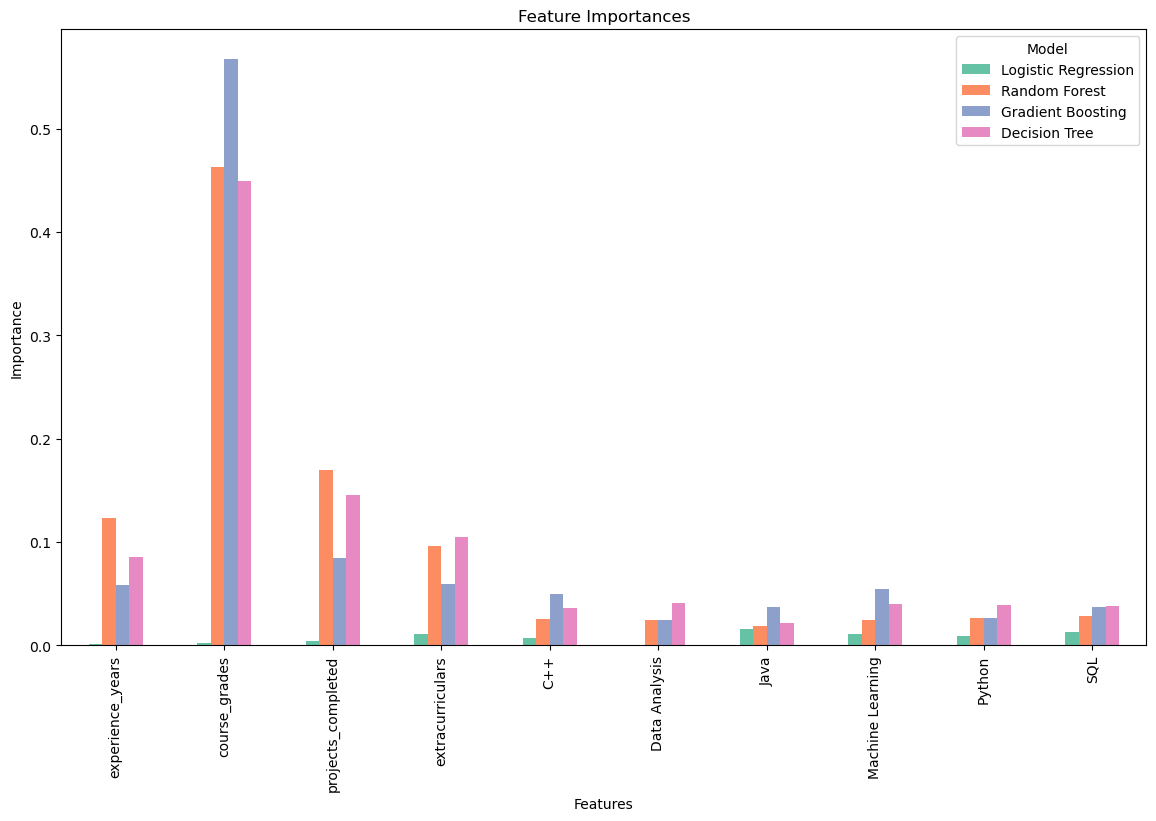

In [814]:
PlotFeaturesImportance(Features,Goal,models)

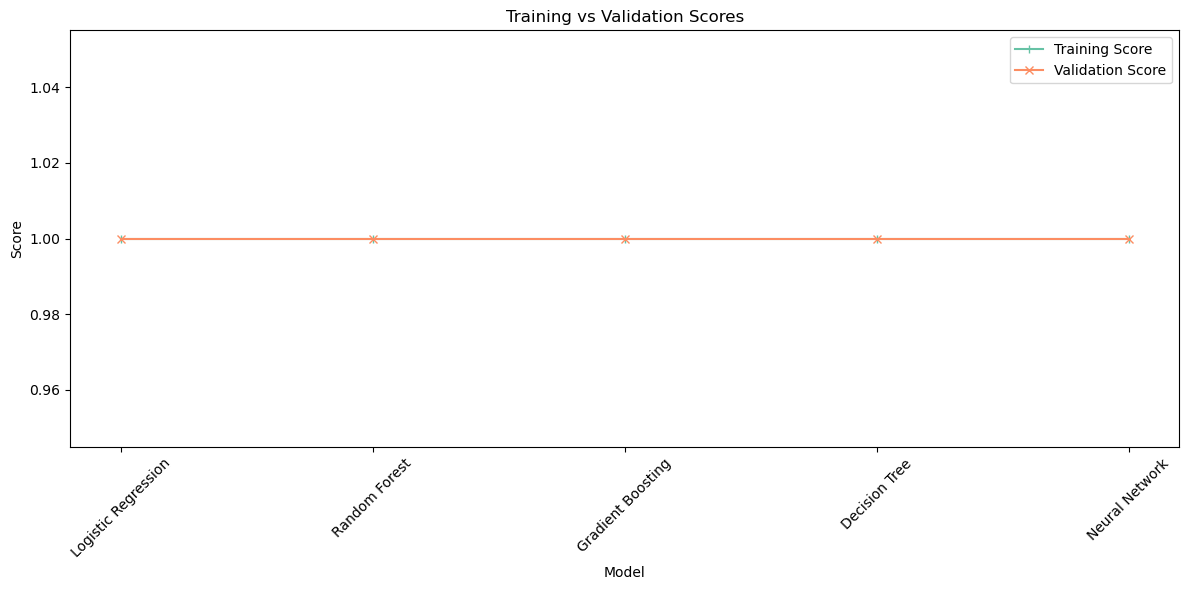

In [808]:
PlotOverfitting(models,Ftrain,Ftest,Gtrain,Gtest)

# Choosing and Saving The Final Model

#### The prefered model to use is  (Neural Network' saved as 'Models - Neural Network.sav') 

In [816]:
SaveModels(models)

Model 'Logistic Regression' saved as 'Models - Logistic Regression.sav'.
Model 'Random Forest' saved as 'Models - Random Forest.sav'.
Model 'Gradient Boosting' saved as 'Models - Gradient Boosting.sav'.
Model 'Decision Tree' saved as 'Models - Decision Tree.sav'.
Model 'Neural Network' saved as 'Models - Neural Network.sav'.
